<a href="https://colab.research.google.com/github/ashirm1999/Web-Traffic-Time-Series-Forecasting/blob/main/LSTM_V2_Ashir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kaggle

In [2]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [1]:
! kaggle competitions download web-traffic-time-series-forecasting

train_2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_1.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
key_1.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
key_2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission_2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission_1.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
#! unzip key_1.csv.zip
#! unzip key_2.csv.zip
! unzip train_1.csv.zip
! unzip train_2.csv.zip

Archive:  train_1.csv.zip
replace train_1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  train_2.csv.zip
replace train_2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import random

In [20]:
df1 = pd.read_csv('/content/train_1.csv')
df2 = pd.read_csv('/content/train_2.csv')

In [21]:
df1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [22]:
df1.isna().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [23]:
df1 = df1.fillna(0)

In [24]:
page = df1['Page']
df1 = df1.drop('Page',axis = 1)

In [25]:
page = df2['Page']
df2 = df2.drop('Page',axis = 1)

In [26]:
train_row = df1.iloc[90000,:].values
X = train_row[0:499]
y = train_row[1:500]

sc = MinMaxScaler()
X_train = np.reshape(X,(-1,1))
y_train = np.reshape(y,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Reshaping Array
X_train = np.reshape(X_train, (499,1,1))
regressor = Sequential()
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

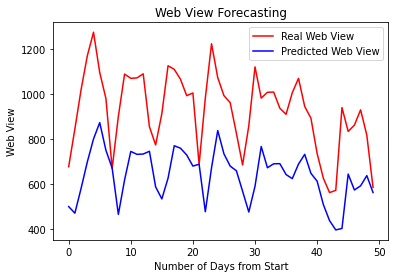

In [27]:
# Getting the predicted Web View
test_row = df1.iloc[5000,:].values
X_test = test_row[50:549]
y_test = test_row[500:550]

inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (499, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred[449:],color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

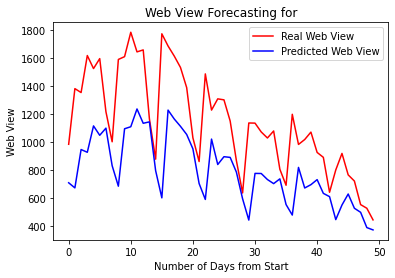

In [28]:
X_value = random.randint(0,df1.shape[0])
test_row = df1.iloc[X_value,:].values
X_test = test_row[50:549]
y_test = test_row[500:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (499, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred[449:], color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting for')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [29]:
y_test_mean = []
y_pred_mean = []
for X_value in range(1000,2000):
    test_row = df1.iloc[X_value,:].values
    X_test = test_row[50:549]
    y_test = test_row[500:550]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (499, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))

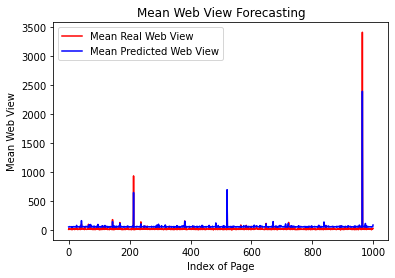

In [30]:
#Visualising mean
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real Web View')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted Web View')
plt.title('Mean Web View Forecasting')
plt.xlabel('Index of Page')
plt.ylabel('Mean Web View')
plt.legend()
plt.show()

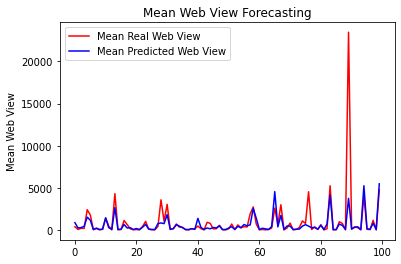

In [34]:
pages = np.random.randint(0,df1.shape[0],100)
y_test_mean = []
y_pred_mean = []
for X_value in pages:
    test_row = df1.iloc[X_value,:].values
    X_test = test_row[50:549]
    y_test = test_row[500:550]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (499, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))
    
#Visualising mean
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real Web View')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted Web View')
plt.title('Mean Web View Forecasting')
plt.ylabel('Mean Web View')
plt.legend()
plt.show()

## Testing on Train 2

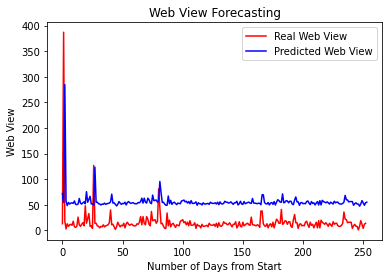

In [44]:
# Getting the predicted Web View
test_row = df2.iloc[500,:].values
X_test = test_row[549:]
y_test = test_row[550:]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (254, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

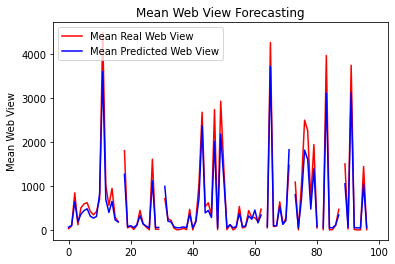

In [36]:
pages = np.random.randint(0,df2.shape[0],100)
y_test_mean = []
y_pred_mean = []
for X_value in pages:
    test_row = df2.iloc[X_value,:].values
    X_test = test_row[549:]
    y_test = test_row[550:]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (254, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))
    
#Visualising mean
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real Web View')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted Web View')
plt.title('Mean Web View Forecasting')
plt.ylabel('Mean Web View')
plt.legend()
plt.show()